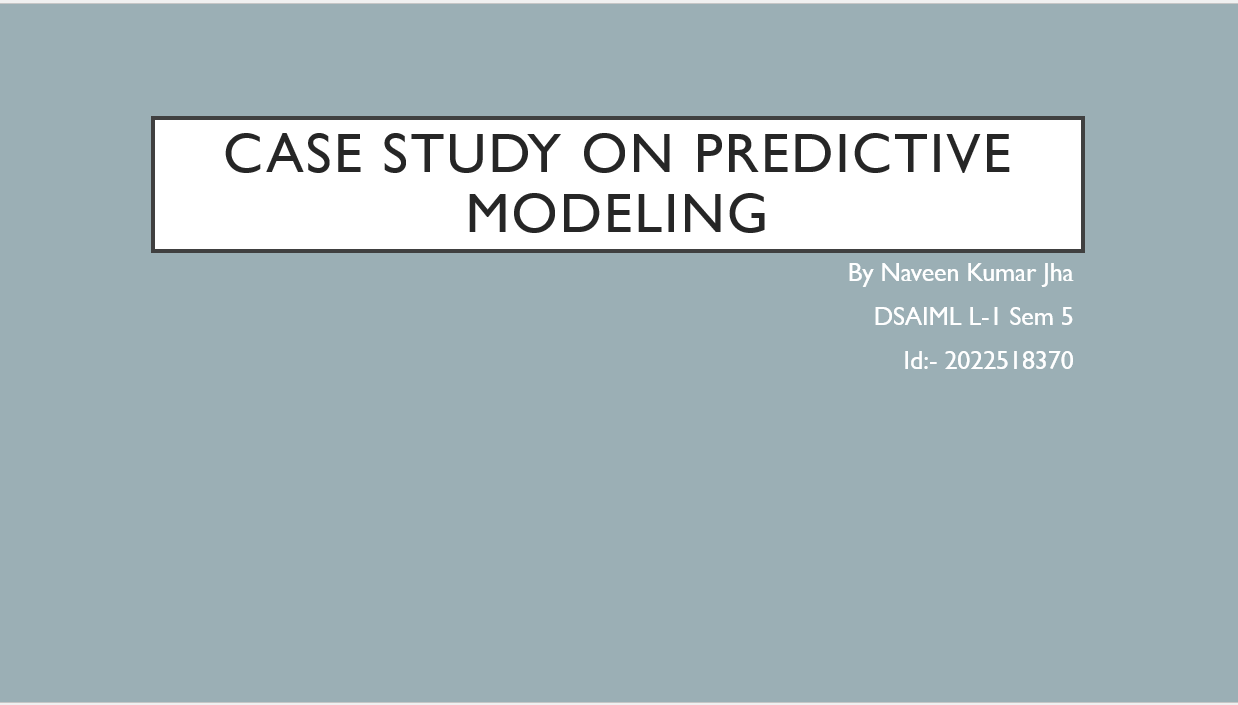

#### Problem Statement
#### Objective
##### A streaming company is focussing on the anime available in the portal and wants to identify the most important factors involved in rating an anime. As a data scientist, you are tasked with analyzing the portal's anime data and identifying the important factors by building a predictive model to predict the rating of an anime
#### Data Dictionary
##### Each record in the database provides a description of an anime. A detailed data dictionary can be found below.
##### 1. title:title of the anime
##### 2. mediaType:format of publication
##### 3.eps:number of episodes ( movies are considered as 1 episode)
##### 4.duration:duration of an episode in minutes
##### 5.startYr:the year that airing started
##### 6.finishYr:the year that airing ended
##### 7.description:the synopsis of the plot
##### 8.contentWarn: Content warning
##### 9.watched: number of users that completed it
##### 10.watching: number of users that are watching it
##### 11.rating:Average user rating
##### 12.votes: number of voters that contribute to rating
##### 13.studio_primary: studios responsible for creation
##### 14.studios_colab: whether there was a collaboration between studios for anime production
##### 15.genre: genre to which the anime belongs

#### Installing and Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [2]:
data=pd.read_csv('AnimeRatings.csv')

#### Display first few rows of the dataset

In [3]:
data.head()

,title,mediaType,eps,duration,startYr,finishYr,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre
0,Dragon Ball Z Movie 15: Resurrection 'F',Movie,1,67.0,2015,2015,Even the complete obliteration of his physical...,No,4649,86,3.979,3100.0,Toei Animation,No,Other
1,Kuripuri*Kuripura,Movie,1,5.0,2008,2008,NaN,No,10,0,2.120,10.0,Others,No,Other
2,GJ-bu@,TV Special,1,46.0,2014,2014,The story is set during the spring vacation im...,No,1630,16,3.758,1103.0,Others,No,Other
3,Nausicaa of the Valley of the Wind,Movie,1,67.0,1984,1984,One thousand years after the Giant Warriors ca...,No,4649,184,4.444,3100.0,Others,No,Drama
4,Miru Tights Special,DVD Special,1,4.0,2019,2019,Yua is asked to model an illustrator's designs...,No,346,8,2.494,234.0,Others,No,Other


##### Observations
##### The dataset contains information about diffrent anime
##### Many anime have single episode only, which are movies
##### Description is missing for some

#### Checking the shape for dataset

In [4]:
data.shape

(6523, 15)

#### Checking the data types of the columns of the dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6523 entries, 0 to 6522
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           6523 non-null   object 
 1   mediaType       6496 non-null   object 
 2   eps             6523 non-null   int64  
 3   duration        6248 non-null   float64
 4   startYr         6523 non-null   int64  
 5   finishYr        6523 non-null   int64  
 6   description     4114 non-null   object 
 7   contentWarn     6523 non-null   object 
 8   watched         6523 non-null   int64  
 9   watching        6523 non-null   int64  
 10  rating          6523 non-null   float64
 11  votes           6496 non-null   float64
 12  studio_primary  6523 non-null   object 
 13  studios_colab   6523 non-null   object 
 14  genre           6523 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 764.5+ KB


##### 8 numeric and 7 string columns
##### The target variable is the rating of an anim, which is of float type

#### Statistical summary of dataset

In [6]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
title,6523,6523,Dragon Ball Z Movie 15: Resurrection 'F',1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mediaType,6496,8,TV,2145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eps,6523.0,NaN,NaN,NaN,8.716235,11.002479,1.0,1.0,1.0,12.0,34.0
duration,6248.0,NaN,NaN,NaN,18.396287,20.94935,1.0,5.0,7.0,25.0,67.0
startYr,6523.0,NaN,NaN,NaN,2005.241147,12.911035,1967.0,2000.0,2010.0,2015.0,2020.0
finishYr,6523.0,NaN,NaN,NaN,2005.575349,12.568169,1970.0,2000.0,2010.0,2015.0,2020.0
description,4114,4081,"In 19th century Belgium, in the Flanders count...",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contentWarn,6523,2,No,5825,NaN,NaN,NaN,NaN,NaN,NaN,NaN
watched,6523.0,NaN,NaN,NaN,1347.948643,1737.138112,5.0,56.0,349.0,2252.5,4649.0
watching,6523.0,NaN,NaN,NaN,57.445654,76.527405,0.0,2.0,13.0,98.0,199.0


##### Anime ratings vary between 1.1 and 4.7 which suggests that the anime were rated on a scale of 0.5
##### The general rating of anime is 2.96
##### TV is most occuring type of media
##### Votes vary between 10 to 3100

#### Checking for duplicate values

In [7]:
data.duplicated().sum()

0

#### Checking for missing values

In [8]:
data.isnull().sum()

title                0
mediaType           27
eps                  0
duration           275
startYr              0
finishYr             0
description       2409
contentWarn          0
watched              0
watching             0
rating               0
votes               27
studio_primary       0
studios_colab        0
genre                0
dtype: int64

##### Missing value exist in some columns particularly in description

In [9]:
df=data.copy()

#### Exploratory data analysis

#### Data processing
#### Missing values treatement

In [10]:
df.isnull().sum()

title                0
mediaType           27
eps                  0
duration           275
startYr              0
finishYr             0
description       2409
contentWarn          0
watched              0
watching             0
rating               0
votes               27
studio_primary       0
studios_colab        0
genre                0
dtype: int64

##### mediaType variable will get imputed with 'other' as the exact values for that category aren't known
##### For duration and votes, missing values will be imputed with the median grouped by genre and mediaType as both columns have skewed distributions

In [11]:
df1=df.copy()

In [12]:
df1.mediaType.fillna('other',inplace=True)
df1['duration']=df1['duration'].fillna(value=df1.groupby(['genre','mediaType'])['duration'].transform('median'))
df1['votes']=df1['votes'].fillna(value=df1.groupby(['genre','mediaType'])['votes'].transform('median'))


In [13]:
df1.isnull().sum()

title                0
mediaType            0
eps                  0
duration            35
startYr              0
finishYr             0
description       2409
contentWarn          0
watched              0
watching             0
rating               0
votes               27
studio_primary       0
studios_colab        0
genre                0
dtype: int64

In [14]:
df1['duration']=df1['duration'].fillna(value=df1.groupby(['genre'])['duration'].transform('median'))

In [15]:
df1.isnull().sum()

title                0
mediaType            0
eps                  0
duration             0
startYr              0
finishYr             0
description       2409
contentWarn          0
watched              0
watching             0
rating               0
votes               27
studio_primary       0
studios_colab        0
genre                0
dtype: int64

#### Feature 
##### Creating a new feature yearsrunning by taking the difference between finishYr and startYr columns
##### We will drop original columns startYr and finishYr as they are not numerical in nature

In [16]:
df1['yearsRunning']=df1['finishYr']-df1['startYr']
df1.drop(['startYr','finishYr'],axis=1,inplace=True)
df1.head()

,title,mediaType,eps,duration,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre,yearsRunning
0,Dragon Ball Z Movie 15: Resurrection 'F',Movie,1,67.0,Even the complete obliteration of his physical...,No,4649,86,3.979,3100.0,Toei Animation,No,Other,0
1,Kuripuri*Kuripura,Movie,1,5.0,NaN,No,10,0,2.120,10.0,Others,No,Other,0
2,GJ-bu@,TV Special,1,46.0,The story is set during the spring vacation im...,No,1630,16,3.758,1103.0,Others,No,Other,0
3,Nausicaa of the Valley of the Wind,Movie,1,67.0,One thousand years after the Giant Warriors ca...,No,4649,184,4.444,3100.0,Others,No,Drama,0
4,Miru Tights Special,DVD Special,1,4.0,Yua is asked to model an illustrator's designs...,No,346,8,2.494,234.0,Others,No,Other,0


#### Outlier detection

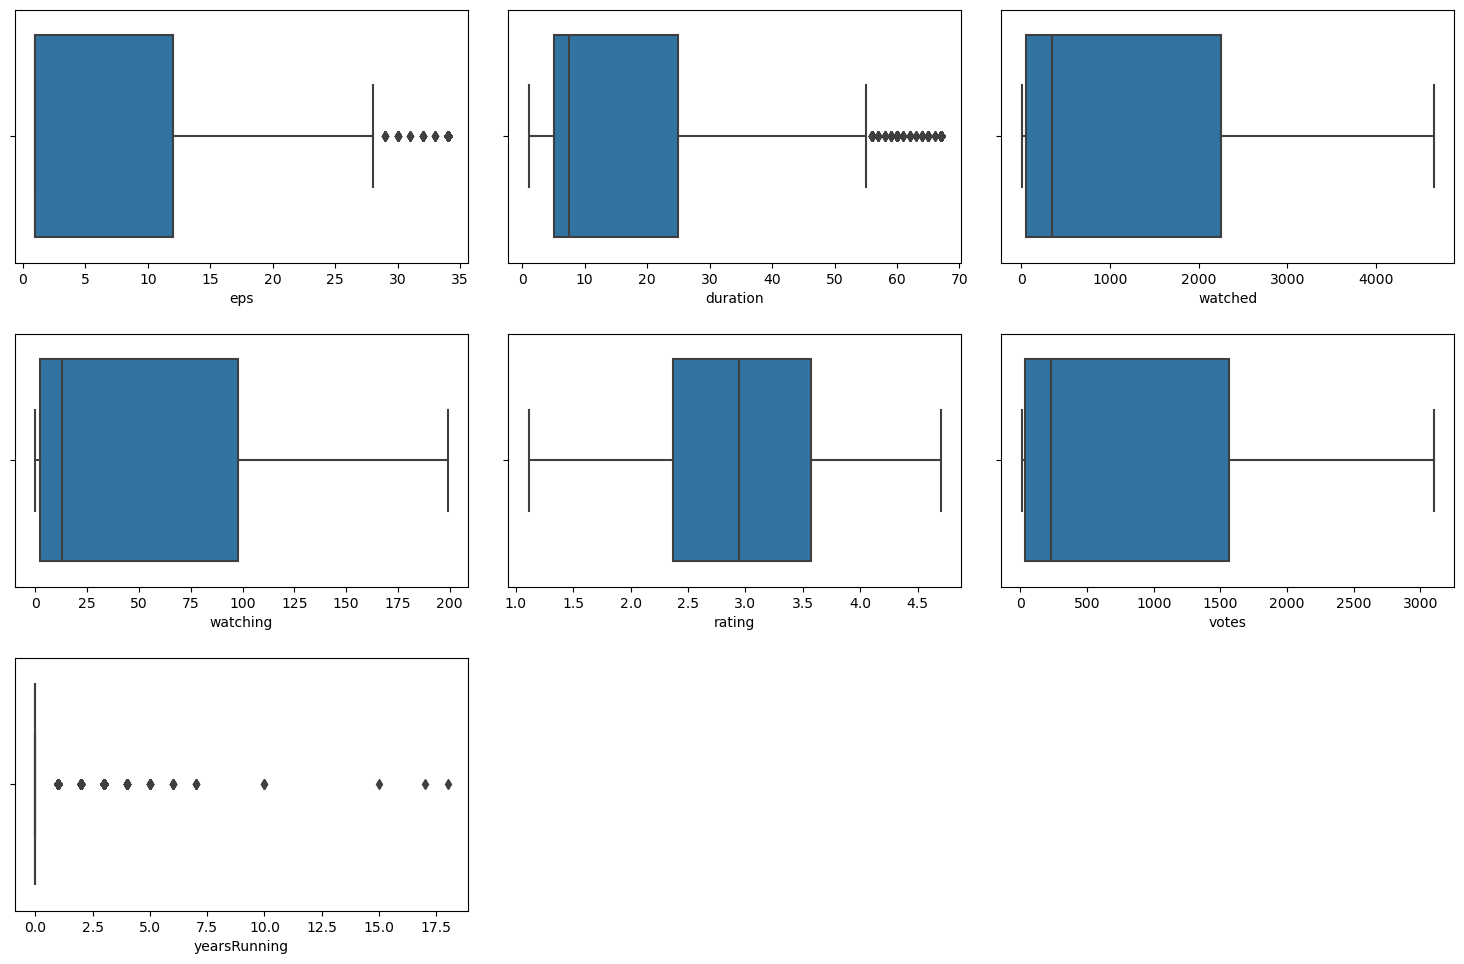

In [17]:
numcols=df1.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15,10))
for i,variable in enumerate(numcols):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=df1,x=variable)
    plt.tight_layout(pad=2)
plt.show()

##### Although there are many outliers but they don't need treatement as they are proper values.
##### Columns title and descriptions be dropped as they have lot of text and too many unique values to be useful in predictive modeling

In [18]:
df1.drop(['title','description'],axis=1,inplace=True)
df1.head()

,mediaType,eps,duration,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre,yearsRunning
0,Movie,1,67.0,No,4649,86,3.979,3100.0,Toei Animation,No,Other,0
1,Movie,1,5.0,No,10,0,2.120,10.0,Others,No,Other,0
2,TV Special,1,46.0,No,1630,16,3.758,1103.0,Others,No,Other,0
3,Movie,1,67.0,No,4649,184,4.444,3100.0,Others,No,Drama,0
4,DVD Special,1,4.0,No,346,8,2.494,234.0,Others,No,Other,0


#### Data preparation for modeling
##### Data will be split into train and test to be able to evaluate the model to be built on the train data
##### We will build a linear regression model using the train data and then check it's performance

In [19]:
df2=df1.copy()

In [20]:
X=df2.drop(['rating'],axis=1)
y=df2['rating']
X=sm.add_constant(X)
X=pd.get_dummies(X,columns=X.select_dtypes(include=['object','category']).columns.tolist(),drop_first=True)
X.head()

,const,eps,duration,watched,watching,votes,yearsRunning,mediaType_Movie,mediaType_Music Video,mediaType_OVA,...,studio_primary_Toei Animation,studios_colab_Yes,genre_Adventure,genre_Based on a Manga,genre_Comedy,genre_Drama,genre_Fantasy,genre_Other,genre_Romance,genre_Sci Fi
0,1.0,1,67.0,4649,86,3100.0,0,True,False,False,...,True,False,False,False,False,False,False,True,False,False
1,1.0,1,5.0,10,0,10.0,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,1.0,1,46.0,1630,16,1103.0,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,1.0,1,67.0,4649,184,3100.0,0,True,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1.0,1,4.0,346,8,234.0,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [21]:
#Converting the input attributes into float type for modeling
X=X.astype(float)
X.head()

,const,eps,duration,watched,watching,votes,yearsRunning,mediaType_Movie,mediaType_Music Video,mediaType_OVA,...,studio_primary_Toei Animation,studios_colab_Yes,genre_Adventure,genre_Based on a Manga,genre_Comedy,genre_Drama,genre_Fantasy,genre_Other,genre_Romance,genre_Sci Fi
0,1.0,1.0,67.0,4649.0,86.0,3100.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,1.0,5.0,10.0,0.0,10.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,46.0,1630.0,16.0,1103.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1.0,67.0,4649.0,184.0,3100.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,1.0,4.0,346.0,8.0,234.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [22]:
#Splitting the data in 70:30 for train to test data
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=1)
print("Train data has rows:",xtrain.shape[0])
print("Test data has rows:",xtest.shape[0])

Train data has rows: 4566
Test data has rows: 1957


#### Model building-Linear Regression

In [23]:
xtrain = xtrain.fillna(xtrain.mean())  # Replace NaN with column mean
ytrain = ytrain.fillna(ytrain.mean()) 
olsmodel=sm.OLS(ytrain,xtrain).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     346.8
Date:                Wed, 20 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:00:01   Log-Likelihood:                -2307.5
No. Observations:                4566   AIC:                             4685.
Df Residuals:                    4531   BIC:                             4910.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

#### Interpreting the Regression Results

#### Part 1
##### 1.Adjusted. R-squared: It reflects the fit of the model
##### Adjusted R-squared values generally range from 0 to 1, where a higher values indicates a better fit. In our case R-squared is 0.722
##### 2.const coefficient: It is the Y-intercept.
##### It means that if all the predictor variable coefficients are zero, then the expected output be equal to const coefficient. In our case its value is 2.7707
##### 3.Coefficient of a predictor variable: It represents the change in the output Y due to change in the predictor variable which is 0.0123 in our case

#### Model performance Check
##### Utilizing various metrics for performance check
##### We will utilizing metric functions defined in sklearn for RMSE,MAE and R^2
##### We will also define a function to calculate MAPE ( Mean Absolute Percentage Error) and adjusted R square. MAPE measures the accuracy of predictions as a percentage.
##### We will create a function which will print out all the metrics in one go

In [24]:
def modelPerformanceRegression(model,predictors,target):
    pred=model.predict(predictors)
    r2=r2_score(target,pred)
    rmse=np.sqrt(mean_squared_error(target,pred))
    mae=mean_absolute_error(target,pred)
    df_perf=pd.DataFrame({"RMSE":rmse,"MAE":mae,"R-squared":r2,},index=[0])
    return df_perf

In [25]:
#Checking model performance on train set i.e 70% data
print('Training Performance\n')
olsmodel_train_perf=modelPerformanceRegression(olsmodel,xtrain,ytrain)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared
0,0.401093,0.330372,0.722425


In [26]:
#Checking model performance on test set i.e 30% data
xtest = xtest.fillna(xtrain.mean())  # Replace NaN with column mean
ytest = ytest.fillna(ytrain.mean())
print('Test performance\n')
olsmodel_test_perf=modelPerformanceRegression(olsmodel,xtest,ytest)
olsmodel_test_perf

Test performance



,RMSE,MAE,R-squared
0,0.413015,0.340411,0.70317


#### Observations
##### The training R-squared is 0.72, so the model is not underfitting
##### The train and test RMSE and MAE are comparable, so the model is not overfitting either
##### MAE suggests that the model can predict anime ratings within a mean error of 0.34 on test data

#### 2-Checking Linear Regression Assumptions
##### Following Linear Regression assumptions be checked
##### 1.No Multicollinearity
##### 2.Linearity of variables
##### 3.Independence of error terms
##### 4.Normality of error terms
##### 5.No Heteroscedasticity

#### Test for Multicollinearity
##### Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation can be a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problem in fitting the result.
##### There are various ways which can detect multicollinearity one of them is Variance Inflation Factor which measures the inflation in the variances of regression
##### Some general rules:
##### If VIF between 1 and 5 means low multicollinearity
##### If VIF between 5 and 10 means medium multicollinearity
##### If VIF is exceeding 10 means high mutlicollinearity

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def checkvif(predictors):
    vif=pd.DataFrame()
    vif['feature']=predictors.columns
    vif['VIF']=[variance_inflation_factor(predictors.values,i) for i in range(len(predictors.columns))]
    return vif
checkvif(xtrain).sort_values('VIF',ascending=False)

,feature,VIF
0,const,152.527303
5,votes,84.620181
3,watched,72.655327
32,genre_Other,11.592526
19,studio_primary_Others,11.132412
11,mediaType_TV,6.997913
4,watching,5.082615
27,genre_Adventure,4.198775
7,mediaType_Movie,4.064214
25,studio_primary_Toei Animation,3.983140


##### Multiple columns contain multicollinearity which we need to remove

#### Removing multicollinearity
##### To remove multicollinearity, we need to drop column one by one that has vif score greater than 5. Also look at the adjusted R-squared and RMSE of all these nodels. Drop the variable that makes the least change in adjusted R-squared and check the VIF scores again. Continue till you get all VIF scores under 5

In [36]:
def treatmulticollinearity(predictors,target,highvifcolumns):
    """ Checking the effect of dropping the columns showing high multicollinearity on model performance ( adj.R-squared and RMSE)
    predictors: independent variable
    target: dependent variable
    highvifcolumns: columns having high vif 
    """
    adjr2=[]
    rmse=[]
    for cols in highvifcolumns:
        train=predictors.loc[:,~predictors.columns.str.startswith(cols)]
        olsmodel=sm.OLS(target,train).fit()
        adjr2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))
    temp=pd.DataFrame(
            { "col":highvifcolumns,
            "adj.R-squared after_dropping col":adjr2,
            "RMSE after dropping col":rmse,
            }
            ).sort_values(by="adj.R-squared after_dropping col",ascending=False)
    temp.reset_index(drop=True, inplace=True)
    return temp

col_list=["watched","votes"]
res=treatmulticollinearity(xtrain,ytrain,col_list)
res

,col,adj.R-squared after_dropping col,RMSE after dropping col
0,votes,0.717075,0.404985
1,watched,0.708472,0.411096


In [41]:
col_to_drop="votes"
xtrain2=xtrain.loc[:,~xtrain.columns.str.startswith(col_to_drop)]
xtest2=xtest.loc[:,~xtest.columns.str.startswith(col_to_drop)]
vif=checkvif(xtrain2)
print("VIF after dropping ",col_to_drop)
vif

VIF after dropping  votes


,feature,VIF
0,const,152.255357
1,eps,3.875146
2,duration,2.751927
3,watched,3.235549
4,watching,4.157658
5,yearsRunning,1.272527
6,mediaType_Movie,4.061141
7,mediaType_Music Video,2.408230
8,mediaType_OVA,3.049382
9,mediaType_Other,1.672406


##### Since the multicollinearity in the data has been done now we will rebuild the model using the updated set of predictors variables

In [43]:
olsmod1=sm.OLS(ytrain,xtrain2).fit()
print(olsmod1.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     351.6
Date:                Wed, 20 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:09:50   Log-Likelihood:                -2334.6
No. Observations:                4566   AIC:                             4737.
Df Residuals:                    4532   BIC:                             4956.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

#### Interpreting the Regression Results:
##### Since there isn't significant drop in adj,R-squared, it shows that the dropped column did not have much effect on the model. Also, multicollinearity has been removed now we can look at the p-values of predictor variables to check their significance

#### Dealing with high p-value variables
##### We will deal with high p-value variables by dropping the column which has highest p-value after building a model and will repeat the step until there are no columns with p-value >0.05

In [45]:
predictors=xtrain2.copy()
cols=predictors.columns.tolist()
maxpvalue=1
while len(cols)>0:
    xtrainaux=predictors[cols]
    model=sm.OLS(ytrain,xtrainaux).fit()
    p_values=model.pvalues
    maxpvalue=max(p_values)
    feature_with_p_max=p_values.idxmax()
    if maxpvalue>0.05:
        cols.remove(feature_with_p_max)
    else:
        break
selected_features=cols
print(selected_features)

['const', 'eps', 'duration', 'watched', 'watching', 'yearsRunning', 'mediaType_Movie', 'mediaType_Music Video', 'mediaType_OVA', 'mediaType_Other', 'mediaType_TV', 'mediaType_TV Special', 'mediaType_Web', 'contentWarn_Yes', 'studio_primary_J.C. Staff', 'studio_primary_MADHOUSE', 'studio_primary_OLM', 'studio_primary_Others', 'studio_primary_Studio Deen', 'studio_primary_Studio Pierrot', 'studio_primary_Sunrise', 'studio_primary_Toei Animation', 'genre_Adventure', 'genre_Comedy', 'genre_Drama', 'genre_Other']


In [46]:
xtrain3=xtrain2[selected_features]
xtest3=xtest2[selected_features]
olsmod2=sm.OLS(ytrain,xtrain3).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     463.6
Date:                Wed, 20 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:22:01   Log-Likelihood:                -2339.2
No. Observations:                4566   AIC:                             4730.
Df Residuals:                    4540   BIC:                             4898.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [49]:
# Checking model performance on train set
print("Training Performance")
olsmod2_train_perf=modelPerformanceRegression(olsmod2,xtrain3,ytrain)
olsmod2_train_perf

Training Performance


,RMSE,MAE,R-squared
0,0.403884,0.332915,0.718548


In [50]:
# Checking model performance on test set
print("Training Performance")
olsmod2_test_perf=modelPerformanceRegression(olsmod2,xtest3,ytest)
olsmod2_test_perf

Training Performance


,RMSE,MAE,R-squared
0,0.415519,0.341902,0.699561


#### Observations
##### Since no feature has more than p-value of 0.05, we will coniser xtrain3 as the final set of model predictors and olsmod2 as final model to move forward with

#### Test for Linearity and Independence
##### To check for linearity and independence we will make a plot of fitted v residuals and if they don't follow any pattern then we will say model is linear and residuals are independent and if the assumptions is not followed then we will try to transform the variables and make the relationships linear

In [51]:
df_pred=pd.DataFrame()
df_pred['Actual Values']=ytrain
df_pred['Fitted Values']=olsmod2.fittedvalues
df_pred['Residuals']=olsmod2.resid
df_pred.head()

,Actual Values,Fitted Values,Residuals
5432,2.872,2.793716,0.078284
5326,2.766,2.273070,0.492930
1021,4.049,4.428973,-0.379973
836,3.153,3.171984,-0.018984
1396,2.167,2.263183,-0.096183


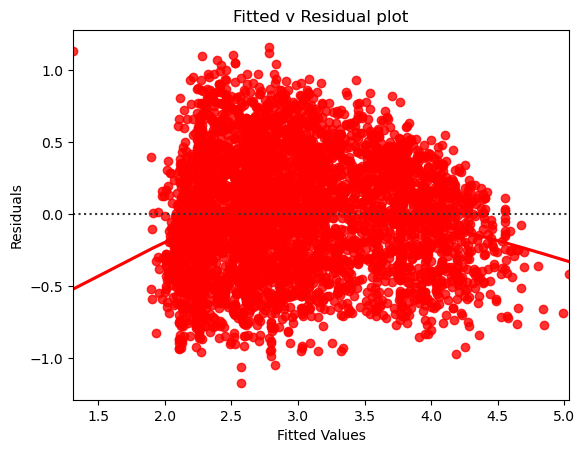

In [54]:
sns.residplot(
    data=df_pred,x="Fitted Values",y='Residuals',color='red',lowess=True
)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted v Residual plot')
plt.show()

##### Since there's no pattern visible in plot above. Hence, the assumptions of linearity and independence are satisfied

#### Test for Normality
##### The shape of histogram pf residuals gives us idea about the normality. It can also be checked via Q-Q plot of residuals. If residuals follow a normal distribution, they will make a straight line plot otherwise not. If the assumptions is not followed then we can apply transformations like log, exponential, arcsinh etc as per our data

C:\Users\PREMRENA\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


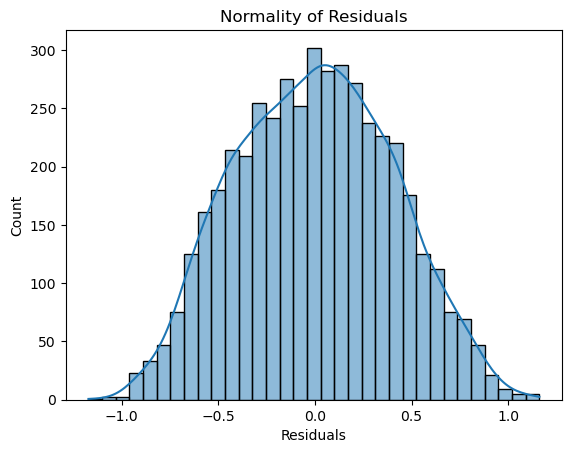

In [55]:
sns.histplot(data=df_pred,x="Residuals",kde=True)
plt.title("Normality of Residuals")
plt.show()

##### Since the histogram of residuals has a bell shape we will look into Q-Q plot 

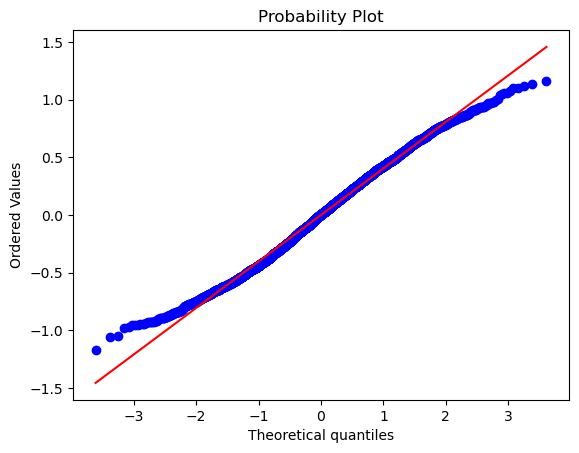

In [56]:
import pylab
import scipy.stats as stats
stats.probplot(df_pred['Residuals'],dist='norm',plot=pylab)
plt.show()

##### Except for tails residuals more or less follows a straight line. Hence, we will check the results of the Shapiro-Wilk test.

In [57]:
stats.shapiro(df_pred['Residuals'])

ShapiroResult(statistic=0.9937714338302612, pvalue=3.438491082575351e-13)

##### Since, p-value<0.05 the residuals are not normal as per the shapiro-wilk test. Thus, our assumptions is satisfied.

#### Test for Homoscedasticity
##### This test is used to judge whether the variance of the residuals is symmetrically distributed across the regression line or not.
##### We will utilize the residual v fitted values plot to check for homoscedasticity. We can also use goldfieldquandt for it. If the assumptions are not followed we will fix by adding other importanat features or maing transformations.

In [58]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name=['F statistic','p-value']
test=sms.het_goldfeldquandt(df_pred['Residuals'],xtrain3)
lzip(name,test)

[('F statistic', 1.048672907896522), ('p-value', 0.12950391352593044)]

##### Since, p-value>0.05, it proves that the residuals are homoscedastic.

#### Predictions on test data


In [60]:
pred=olsmod2.predict(xtest3)
df_pred_test=pd.DataFrame({'Actual':ytest,'predicted':pred})
df_pred_test.sample(10,random_state=1)

,Actual,predicted
2023,2.039,2.260255
4543,3.236,3.783038
1914,2.314,2.320484
4856,2.457,2.160471
4405,2.322,2.319911
5755,4.344,3.931553
2341,2.858,2.276210
1637,3.976,3.882641
5730,3.728,3.586738
1385,2.692,2.422789


##### We can observe that our model has returned a decent prediction results and the actual and predicted values are comparable

#### Final Model

In [61]:
xtrainfinal=xtrain3.copy()
xtestfinal=xtest3.copy()
olsmodelfinal=sm.OLS(ytrain,xtrainfinal).fit()
print(olsmodelfinal.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     463.6
Date:                Wed, 20 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:53:43   Log-Likelihood:                -2339.2
No. Observations:                4566   AIC:                             4730.
Df Residuals:                    4540   BIC:                             4898.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         